
## Data 620 - Project 3
### Group Members: Layla Quinones,Maliat Islam & Karim Hammoud

Project 3 - This is a Team Project!

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the devtest set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

Source: Natural Language Processing with Python, exercise 6.10.2.
video link : https://youtu.be/_I14qAi0lwQ

In [302]:
# SEETING UP THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import names
import random
from nltk.classify import apply_features
nltk.download('names')
import plotly.graph_objs as go

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\malia\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


### Loading datasets and creating dataframe

For this project firstly name dataset from NLTK is downloaded.Then it was transformed into a dtaframe

In [227]:
# Get the names and genders
classify_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
random.shuffle(classify_names)

In [228]:
# count the number of names in each gender
Gender_names_g= [g for (n,g) in classify_names]
Gender_names_m = Gender_names_g.count('male')
Gender_names_f = Gender_names_g.count('female')
print("Total Male: {} and Female: {} in dataset of size: {}.".format(Gender_names_m,Gender_names_f,len(Gender_names_g)))

Total Male: 2943 and Female: 5001 in dataset of size: 7944.


In [229]:
# Data frame
data = pd.DataFrame.from_dict(dict(classify_names), orient='index', columns=['gender']).reset_index()
data.columns = 'name', 'Gender' 
data.head()

,name,Gender
0,Cristal,female
1,Owen,male
2,Kipp,female
3,Audrye,female
4,Stephanus,male


Base Gender Feature

In [230]:
def gender_features_base(word):
    return {'last_letter': word[-1]}

In [231]:
gender_features_base('Stefan')

{'last_letter': 'n'}

### Adding gender identification features:
Male and female names have distinct characteristics such as names ending in a, e, and i are likely to be female, while names ending in k, o, r, s, and t are likely to be male. We have build a classifier to model these differences more precisely. We will look for the last letter of a given name.

In [232]:
from nltk.tokenize.sonority_sequencing import SyllableTokenizer

SSP = SyllableTokenizer()


# create various feature columns for exploration
data['length'] = data['name'].str.len()
data['first_letter'] = data['name'].str[0]
data['last_letter'] = data['name'].str[-1]
data['vowel_last_letter'] = data['last_letter'].isin([*'aeiou'])
data['vowel_first_letter'] = data['first_letter'].isin([*'aeiou'])
data['vowels'] = data['name'].str.replace(r'[^aeiou]', '')
data['consonants'] = data['name'].str.replace(r'[aeiou]', '')
data['vowel_count'] = data['vowels'].str.len()
data['consonant_count'] = data['consonants'].str.len()
data["suffix2v"]= data['name'].str[-2:]
data["preffix2v"]= data['name'].str[:2]
data['syllables'] = data['name'].apply(lambda x: len(SSP.tokenize(x)))

# preview data
data.head()

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
C:\Users\malia\Anaconda3\lib\site-packages\nltk\tokenize\sonority_sequencing.py:104: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  " assigning as vowel: '{}'".format(c)


,name,Gender,length,first_letter,last_letter,vowel_last_letter,vowel_first_letter,vowels,consonants,vowel_count,consonant_count,suffix2v,preffix2v,syllables
0,Cristal,female,7,C,l,False,False,ia,Crstl,2,5,al,Cr,2
1,Owen,male,4,O,n,False,False,e,Own,1,3,en,Ow,1
2,Kipp,female,4,K,p,False,False,i,Kpp,1,3,pp,Ki,1
3,Audrye,female,6,A,e,True,False,ue,Adry,2,4,ye,Au,2
4,Stephanus,male,9,S,s,False,False,eau,Stphns,3,6,us,St,3


### Assigning data to test set, devtest set and training set:

In [233]:

random.shuffle(classify_names)
test_set = classify_names[:500]
devtest_set = classify_names[500:1000]   
train_set =classify_names[1000:]

In [234]:
#### summary statistics
data.groupby('Gender').mean()

,length,vowel_last_letter,vowel_first_letter,vowel_count,consonant_count,syllables
Gender,,,,,,
female,6.149126,0.724002,0.0,2.498544,3.650582,2.318220
male,5.942620,0.237820,0.0,2.050884,3.891736,1.905088


### Visualizing different features:
Different features such as name length,peffix,suffix,first and last letters of names on the basis of gender has been visualized.

In [235]:
males = data.loc[data.Gender=='male']
females = data.loc[data.Gender=='female']

In [236]:

males['len'] = [len(x) for x in males.name]
females['len'] = [len(x) for x in females.name]

C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\malia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
male_names_len = males.len.value_counts().sort_index()
female_names_len = females.len.value_counts().sort_index()

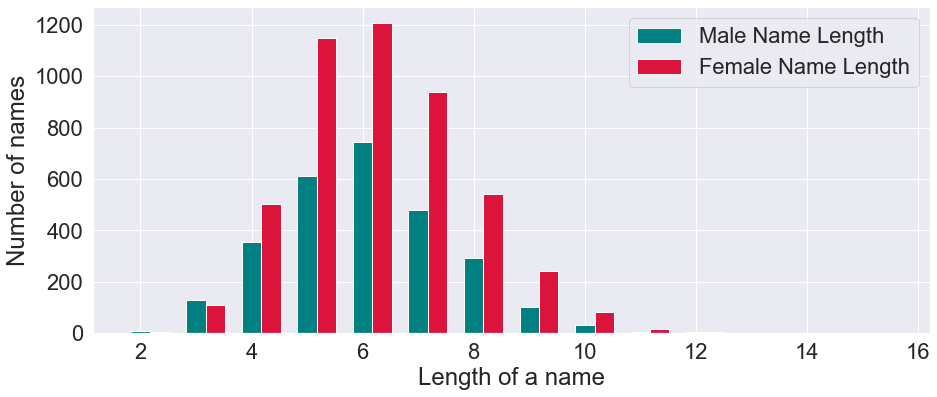

In [238]:
fig,ax = plt.subplots(figsize=[15,6])
labels = np.arange(1,10)
width=0.35
plt.bar(male_names_len.index, male_names_len.values, 
        width=width, color='teal', label='Male Name Length')
plt.bar(female_names_len.index+width, female_names_len.values,
        width=width, color='crimson', label='Female Name Length')

plt.xlabel('Length of a name')
plt.ylabel('Number of names')
plt.legend()
plt.show()

In [239]:

# Setting up the X and y
X = data.drop(columns=['name', 'Gender'])
y = data['Gender']

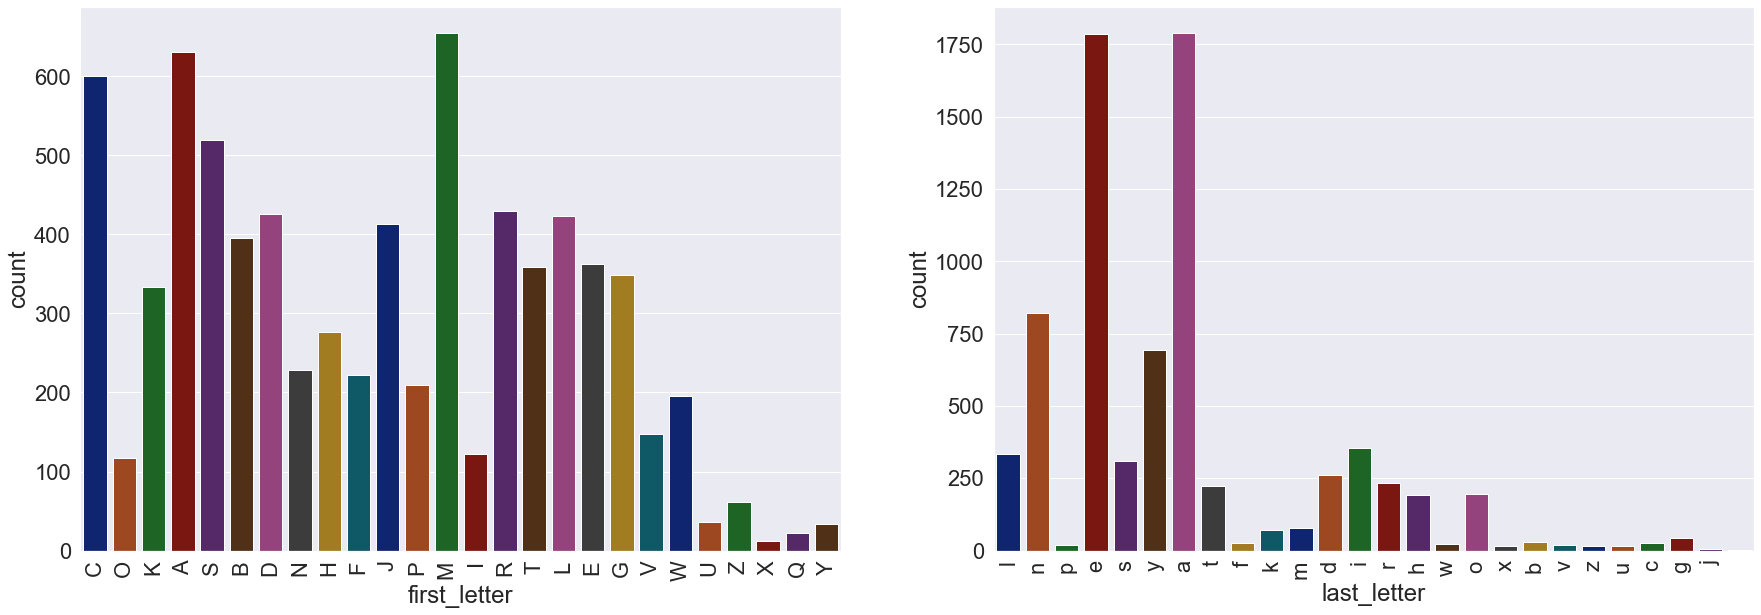

In [240]:

cat_cols = X.loc[:, [col for col in X.columns if 'gram' not in col]].select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.set(font_scale=2)

for var, subplot in zip(cat_cols[:2], ax.flatten()):
    sns.countplot(x=var, data=data, ax=subplot, palette="dark")

    
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
       


C:\Users\malia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\malia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


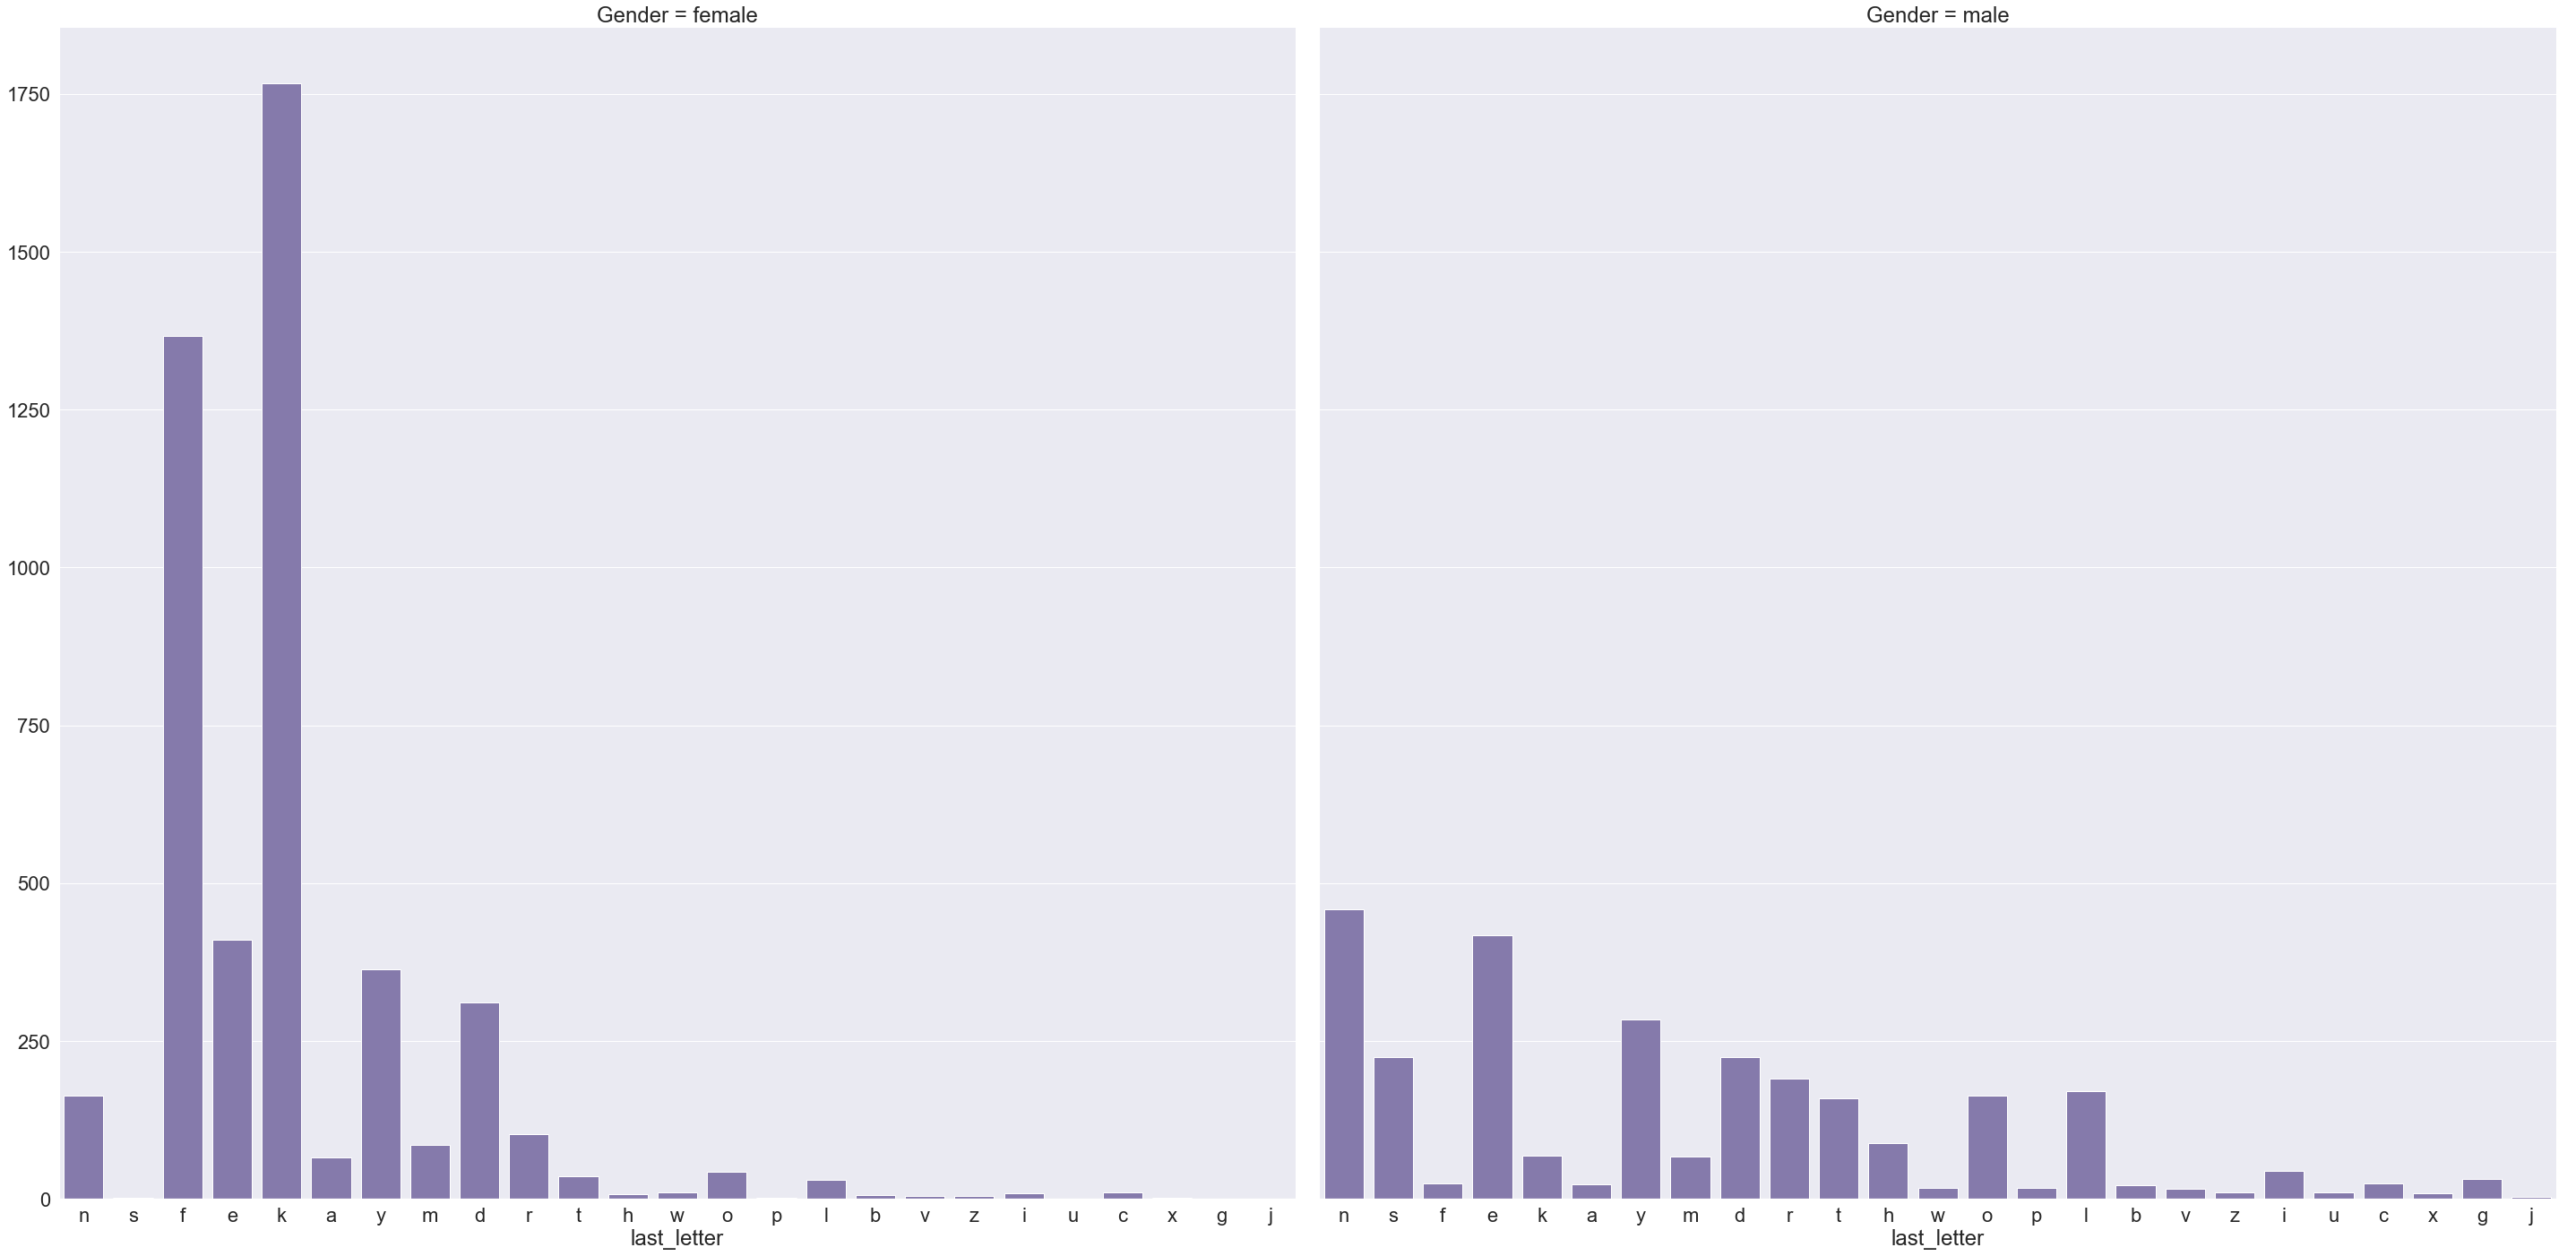

C:\Users\malia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\malia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


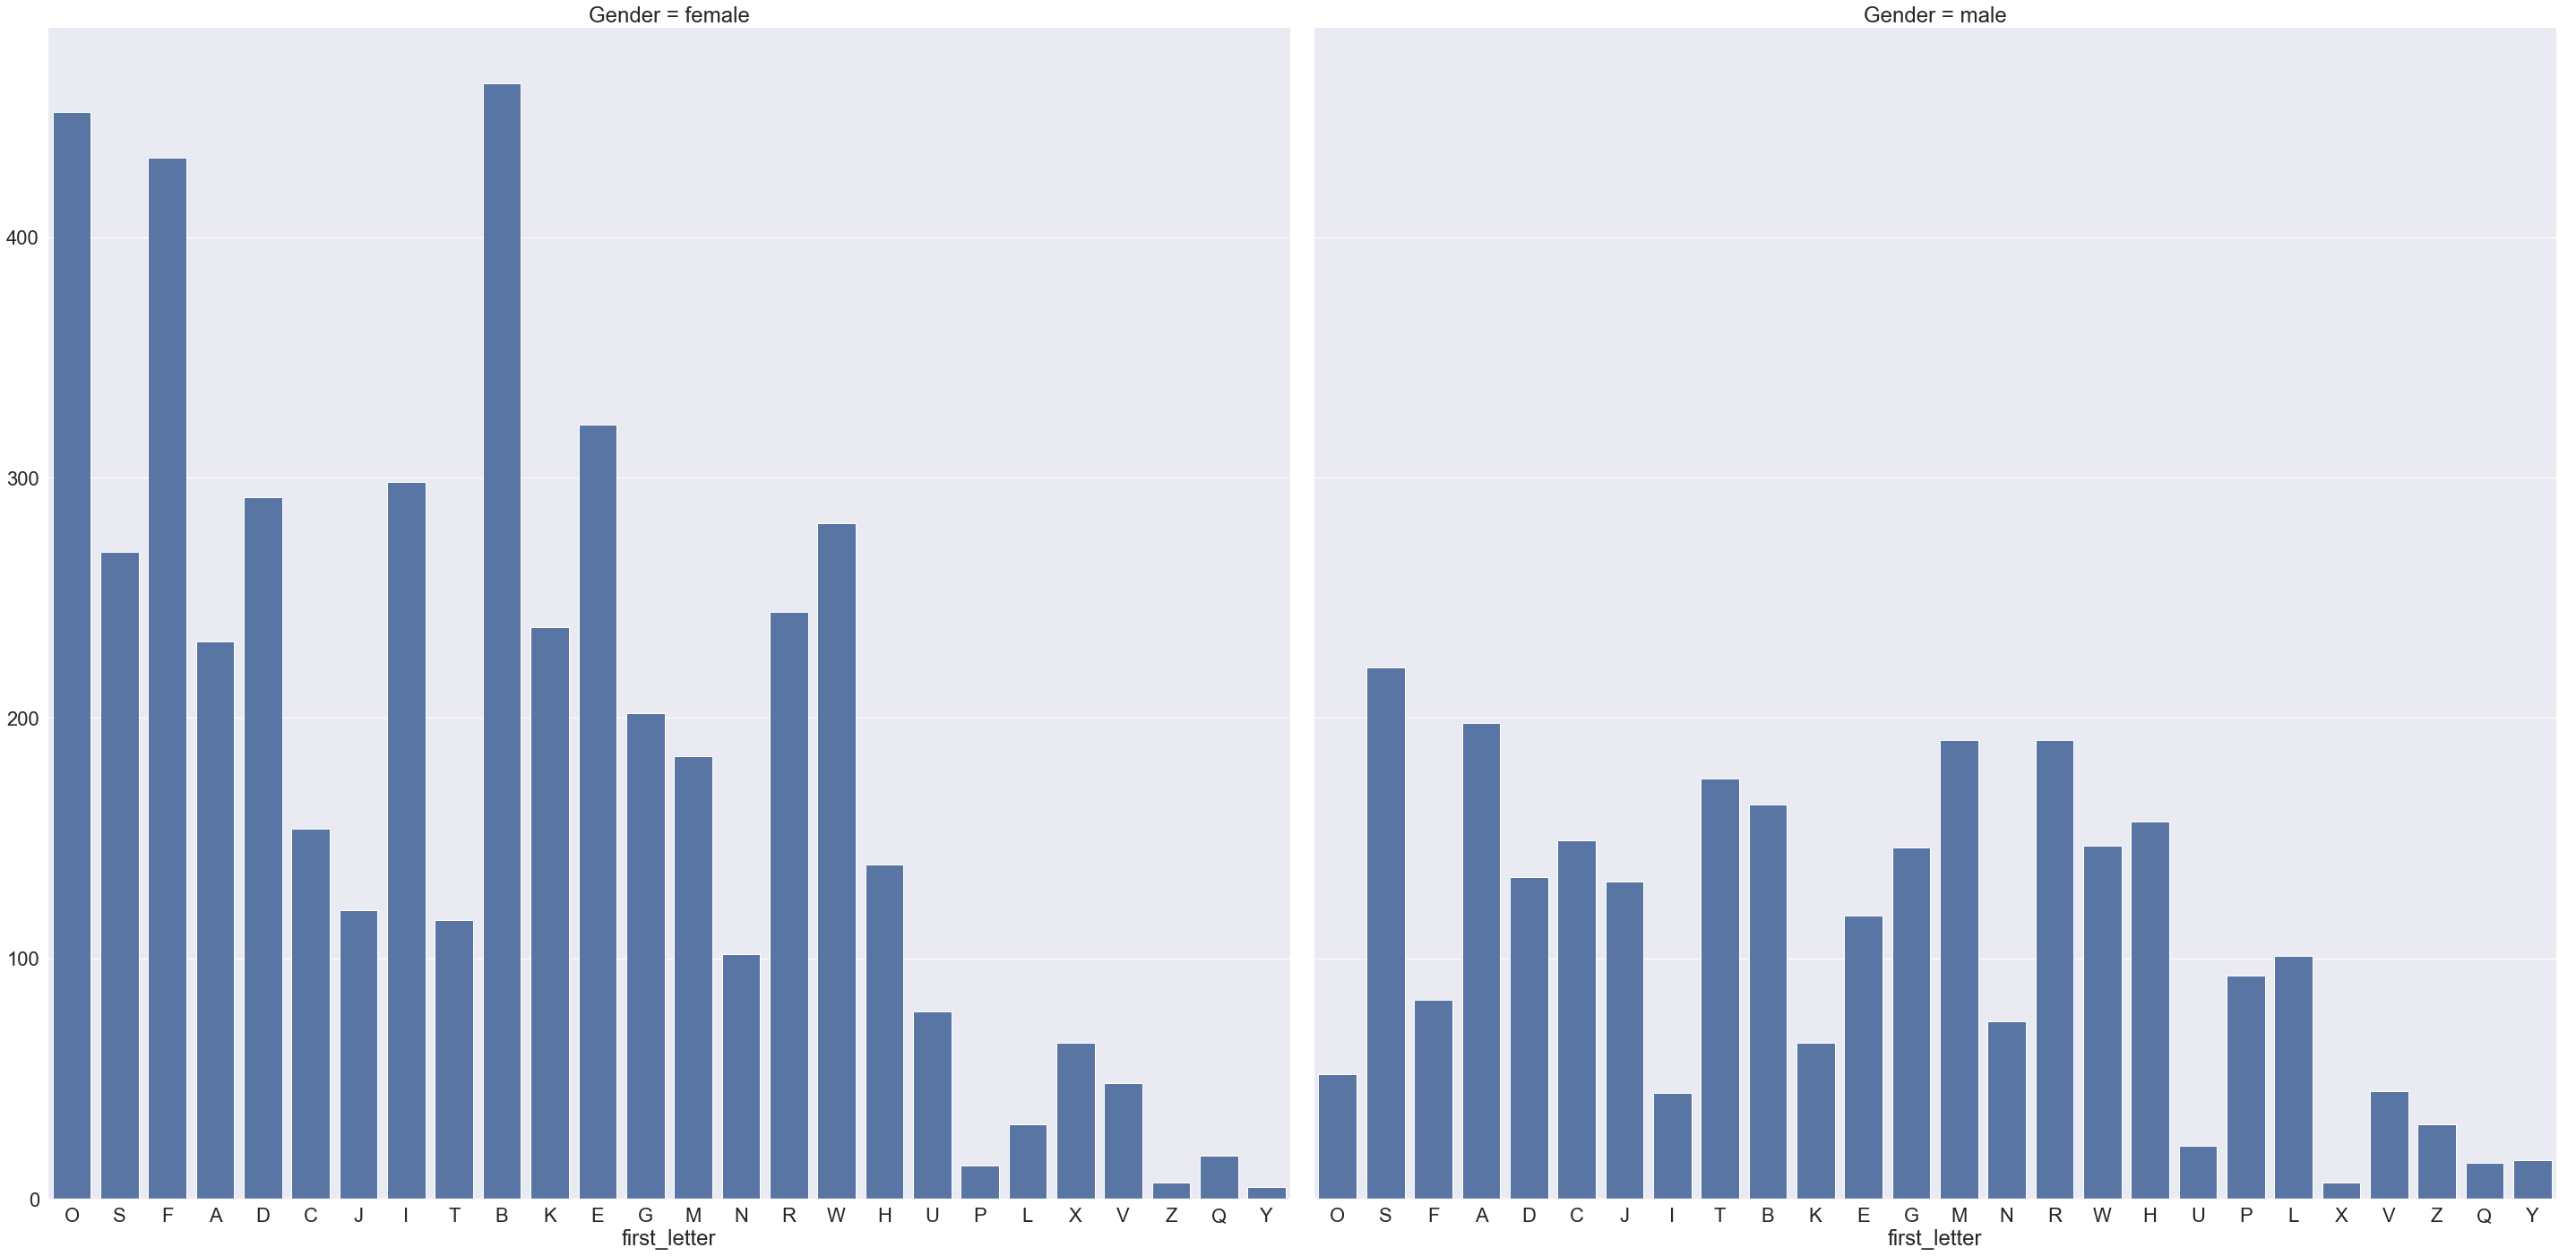

In [241]:
cond_plot = sns.FacetGrid(data=data, col='Gender', size=20)
cond_plot.map(sns.countplot, 'last_letter', color="m").add_legend()
plt.tight_layout()
plt.show()

cond_plot = sns.FacetGrid(data=data, col='Gender', size=20)
cond_plot.map(sns.countplot, 'first_letter').add_legend()
plt.tight_layout()
plt.show()

## Looking at the plot above we can see that the first and last letter can be a good predictive of the gender


C:\Users\malia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
C:\Users\malia\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


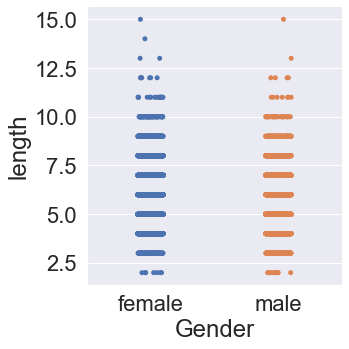

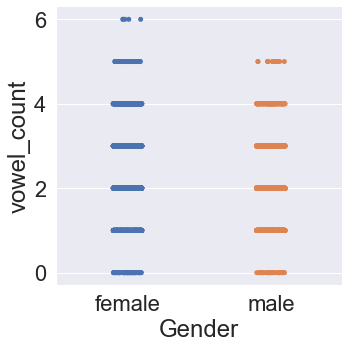

In [242]:

# Explore the numarical columns

for var, subplot in zip(num_cols, ax.flatten()):
    sns.catplot(x='Gender', y=var, data=data, ax=subplot)

### Incorporating feautures to the test,train and dev test.

In [243]:
# creating test,devtest, and train names 
test_names = classify_names[:500]
devtest_names = classify_names[500:1000]   
train_names =classify_names[1000:]

# create the gender features funcion
def gender_fe(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'prefix1': word[:1],
            'prefix1': word[:2]}

train_set = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_fe(n), gender) for (n, gender) in test_names]

#### NaiveBayes classifier
Accuracy of the naive bayes classifier is checked after incorporating the gender_fe feature.

In [244]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.782


In [245]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_fe(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [246]:

for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Addis
correct=female guess=male name=Adelind
correct=female guess=male name=Bev
correct=female guess=male name=Bird
correct=female guess=male name=Brear
correct=female guess=male name=Charlott
correct=female guess=male name=Clary
correct=female guess=male name=Clem
correct=female guess=male name=Cristin
correct=female guess=male name=Crystal
correct=female guess=male name=Dael
correct=female guess=male name=Dido
correct=female guess=male name=Doll
correct=female guess=male name=Dorit
correct=female guess=male name=Doro
correct=female guess=male name=Enid
correct=female guess=male name=Ester
correct=female guess=male name=Flor
correct=female guess=male name=Floris
correct=female guess=male name=Glynnis
correct=female guess=male name=Greer
correct=female guess=male name=Gunvor
correct=female guess=male name=Hayley
correct=female guess=male name=Heather
correct=female guess=male name=Ingeberg
correct=female guess=male name=Isabeau
correct=female guess=male n

After checking the error a new feature is added to use the vowel presence to identify the gender.

In [247]:
def vowel_ratio(word):
    if len(re.findall(r'[aeiouy]', word))/len(word)>= 0.8:
        return ".8+"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.6:
        return "0.6 - 0.8"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.4:
        return "0.4 - 0.6"
    elif len(re.findall(r'[aeiouy]', word))/len(word)>= 0.2:
        return "0.2 - 0.4"
    else: 
        return "< 0.2"

In [248]:
#create a dataframe
names = []
for (name, gender) in train_names:
    names.append(name)

df = pd.DataFrame(names)

In [249]:

#loop through and create a new column
length = []
for row in df[0]:
    length.append(len(row))

df['length'] = length

In [250]:

top_10p = df.quantile(0.9)
bottom_10p = df.quantile(0.1)
print (bottom_10p, top_10p)

length    4.0
Name: 0.1, dtype: float64 length    8.0
Name: 0.9, dtype: float64


In [251]:
def word_length(word):
    if len(word) > 8:
        return ">8"
    elif len(word) < 4:
        return "<4"
    else: 
        return "4-8"

In [252]:
def gender_features(word):
    return {'vowels' : word_length(word)}

In [253]:

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]

In [254]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.624


In [255]:

#I didn't dfind this to improve the model so it is excluded from below
print (classifier.show_most_informative_features(5))

Most Informative Features
                  vowels = '<4'             male : female =      2.0 : 1.0
                  vowels = '>8'           female : male   =      1.4 : 1.0
                  vowels = '4-8'          female : male   =      1.0 : 1.0
None


As the accuracy score was lower than before a new feature is introduced which incorporates the suffix 1,2,3, prefix 1,2,3 and vowels.

In [256]:
#This was my best model so far

def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'vowels' : vowel_ratio(word)}

The naive bayes model has a better score of 0.83 with the application of gender_features model.

In [257]:
import re
re.compile('<title>(.*)</title>')

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]

In [314]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, train_set))

0.8767281105990783


In [258]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.832


In [312]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.82


In [259]:
print (classifier.show_most_informative_features(10))


Most Informative Features
                 suffix2 = 'na'           female : male   =     94.3 : 1.0
                 suffix2 = 'la'           female : male   =     71.1 : 1.0
                 suffix1 = 'k'              male : female =     39.9 : 1.0
                 suffix2 = 'ia'           female : male   =     38.0 : 1.0
                 suffix2 = 'ld'             male : female =     35.1 : 1.0
                 suffix1 = 'a'            female : male   =     33.4 : 1.0
                 suffix2 = 'rt'             male : female =     32.5 : 1.0
                 suffix2 = 'sa'           female : male   =     31.7 : 1.0
                 suffix2 = 'ta'           female : male   =     30.3 : 1.0
                 suffix2 = 'rd'             male : female =     28.9 : 1.0
None


In [260]:
#error check
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))
        
for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Adelind
correct=female guess=male name=Bev
correct=female guess=male name=Bird
correct=female guess=male name=Brear
correct=female guess=male name=Charlott
correct=female guess=male name=Clem
correct=female guess=male name=Cristin
correct=female guess=male name=Dael
correct=female guess=male name=Dido
correct=female guess=male name=Doro
correct=female guess=male name=Effie
correct=female guess=male name=Elke
correct=female guess=male name=Enid
correct=female guess=male name=Ester
correct=female guess=male name=Flor
correct=female guess=male name=Gigi
correct=female guess=male name=Glynnis
correct=female guess=male name=Greer
correct=female guess=male name=Gunvor
correct=female guess=male name=Hayley
correct=female guess=male name=Heather
correct=female guess=male name=Ingeberg
correct=female guess=male name=Isabeau
correct=female guess=male name=Ivy
correct=female guess=male name=Jess
correct=female guess=male name=Konstance
correct=female guess=male name

In [261]:
classifier.classify(gender_features('Leo'))


'male'

In [262]:
classifier.classify(gender_features('Anna'))

'female'

### Decision Tree

####  We will check the application of different features in the performance of the DecisionTree model in predicting gender.

with the gender_fe feature the accuracy score is 0.72. gender_features and gender_features1 model is also implemented. The model performed well with the gender_features which incorporated the preffix,suffix and vowels.

In [264]:
classifier1 = nltk.DecisionTreeClassifier.train(train_set)
print(nltk.classify.accuracy(classifier1, devtest_set))

0.72


In [311]:
classifier1 = nltk.DecisionTreeClassifier.train(train_set)
print(nltk.classify.accuracy(classifier1, test_set))

0.726


In [265]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier1.classify(gender_fe(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [266]:
for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=male guess=female name=Adam
correct=male guess=female name=Addie
correct=male guess=female name=Adolfo
correct=male guess=female name=Adrian
correct=male guess=female name=Adrien
correct=male guess=female name=Agamemnon
correct=male guess=female name=Alastair
correct=male guess=female name=Alden
correct=male guess=female name=Alf
correct=male guess=female name=Alford
correct=male guess=female name=Alister
correct=male guess=female name=Andrea
correct=male guess=female name=Angie
correct=male guess=female name=Antone
correct=male guess=female name=Aram
correct=male guess=female name=Archibald
correct=male guess=female name=Armando
correct=male guess=female name=Ashton
correct=male guess=female name=August
correct=male guess=female name=Baron
correct=male guess=female name=Beale
correct=male guess=female name=Berk
correct=male guess=female name=Bernie
correct=male guess=female name=Bert
correct=male guess=female name=Binky
correct=male guess=female name=Boris
correct=male guess=f

In [267]:
# create the gender features funcion
def gender_fe_1(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'prefix1': word[:1],
            'prefix1': word[:2]}

train_set_1 = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set_1 = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set_1 = [(gender_fe(n), gender) for (n, gender) in test_names]

In [268]:
classifier_1 = nltk.DecisionTreeClassifier.train(train_set_1)
print(nltk.classify.accuracy(classifier_1, devtest_set_1))

0.738


In [269]:

def gender_features1(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'vowels' : vowel_ratio(word)}

In [270]:
### Implementing the gender_features1
random.seed(75)
random.shuffle(devtest_set)
train_set1 = [(gender_features1(n), gender) for (n, gender) in train_names]
devtest_set1 = [(gender_features1(n), gender) for (n, gender) in devtest_names]
test_set1 = [(gender_features1(n), gender) for (n, gender) in test_names]

In [313]:
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, train_set1))

0.9576612903225806


In [271]:
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, devtest_set1))

0.72


In [310]:
classifier1 = nltk.DecisionTreeClassifier.train(train_set1)
print(nltk.classify.accuracy(classifier1, test_set1))

0.726


The devtest has a little lower accuracy in the decision tree model than the test set it is 0.72 vs. 0.73.

In [272]:
# Checking the wrong guesses
errors = []
for (name, tag) in devtest_names:
    guess = classifier1.classify(gender_features1(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [273]:
for (tag, guess, name) in sorted (errors):
    print ('correct={} guess={} name={}'.format(tag, guess, name))

correct=female guess=male name=Addis
correct=female guess=male name=Adelind
correct=female guess=male name=Aurore
correct=female guess=male name=Bennie
correct=female guess=male name=Bird
correct=female guess=male name=Brear
correct=female guess=male name=Caryl
correct=female guess=male name=Ceciley
correct=female guess=male name=Charlott
correct=female guess=male name=Cherice
correct=female guess=male name=Clary
correct=female guess=male name=Clem
correct=female guess=male name=Cristin
correct=female guess=male name=Dael
correct=female guess=male name=Dedie
correct=female guess=male name=Dido
correct=female guess=male name=Doro
correct=female guess=male name=Effie
correct=female guess=male name=Emogene
correct=female guess=male name=Enid
correct=female guess=male name=Ester
correct=female guess=male name=Flor
correct=female guess=male name=Floris
correct=female guess=male name=Gigi
correct=female guess=male name=Ginny
correct=female guess=male name=Gunvor
correct=female guess=male nam

### MaximumEntropy
Maximum entropy model performed well aster applying gender_features.The highest accuracy in the training set was 0.93,compared to gender_fe1 which has 0.80.

gender_featrues also performs well in the maximum entropy model.

In [274]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'prefix1': word[:1],
            'prefix2': word[:2],
            'prefix3': word[:3],
            'vowels' : vowel_ratio(word)}

In [275]:
### Implementing the gender_features
random.seed(75)
random.shuffle(devtest_set)
train_set2 = [(gender_features2(n), gender) for (n, gender) in train_names]
devtest_set2 = [(gender_features2(n), gender) for (n, gender) in devtest_names]
test_set2 = [(gender_features2(n), gender) for (n, gender) in test_names]

In [276]:
mx_entropy = nltk.MaxentClassifier.train(train_set2)

print("train_set: ", nltk.classify.accuracy(mx_entropy, train_set2))
print("test_set: ", nltk.classify.accuracy(mx_entropy, test_set2))
print("devtest_set: ", nltk.classify.accuracy(mx_entropy, devtest_set2))

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.369
             2          -0.39903        0.828
             3          -0.32576        0.864
             4          -0.28878        0.874
             5          -0.26581        0.883
             6          -0.24971        0.890
             7          -0.23751        0.895
             8          -0.22780        0.899
             9          -0.21979        0.904
            10          -0.21300        0.907
            11          -0.20713        0.910
            12          -0.20198        0.911
            13          -0.19741        0.913
            14          -0.19331        0.914
            15          -0.18960        0.915
            16          -0.18622        0.916
            17          -0.18312        0.917
            18          -0.18027        0.918
            19          -0.17763        0.919
 

In [277]:

# create the gender features funcion
def gender_fe1(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'prefix1': word[:1],
            'prefix1': word[:2]}

train_set3 = [(gender_fe(n), gender) for (n, gender) in train_names]
devtest_set3 = [(gender_fe(n), gender) for (n, gender) in devtest_names]
test_set3 = [(gender_fe(n), gender) for (n, gender) in test_names]

In [278]:
mx_entropy1 = nltk.MaxentClassifier.train(train_set3)

print("train_set: ", nltk.classify.accuracy(mx_entropy, train_set3))
print("test_set: ", nltk.classify.accuracy(mx_entropy, test_set3))
print("devtest_set: ", nltk.classify.accuracy(mx_entropy, devtest_set3))

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.369
             2          -0.36561        0.812
             3          -0.32126        0.827
             4          -0.30257        0.831
             5          -0.29200        0.834
             6          -0.28503        0.835
             7          -0.28000        0.836
             8          -0.27618        0.837
             9          -0.27315        0.839
            10          -0.27069        0.839
            11          -0.26865        0.839
            12          -0.26693        0.839
            13          -0.26547        0.840
            14          -0.26420        0.840
            15          -0.26310        0.840
            16          -0.26212        0.840
            17          -0.26126        0.840
            18          -0.26049        0.840
            19          -0.25980        0.840
 

gender_features function yields to better accuracy to the bayes, decision tree and maximum entropy model.It has been vectorized to implement on the decision tree model from the Scikit learn.

In [285]:
# Vectorize the features function
features = np.vectorize(gender_features)
print(features(["Anna", "Hannah", "Peter","John","Vladmir"]))

[{'suffix1': 'a', 'suffix2': 'na', 'suffix3': 'nna', 'prefix1': 'A', 'prefix2': 'An', 'prefix3': 'Ann', 'vowels': '0.2 - 0.4'}
 {'suffix1': 'h', 'suffix2': 'ah', 'suffix3': 'nah', 'prefix1': 'H', 'prefix2': 'Ha', 'prefix3': 'Han', 'vowels': '0.2 - 0.4'}
 {'suffix1': 'r', 'suffix2': 'er', 'suffix3': 'ter', 'prefix1': 'P', 'prefix2': 'Pe', 'prefix3': 'Pet', 'vowels': '0.4 - 0.6'}
 {'suffix1': 'n', 'suffix2': 'hn', 'suffix3': 'ohn', 'prefix1': 'J', 'prefix2': 'Jo', 'prefix3': 'Joh', 'vowels': '0.2 - 0.4'}
 {'suffix1': 'r', 'suffix2': 'ir', 'suffix3': 'mir', 'prefix1': 'V', 'prefix2': 'Vl', 'prefix3': 'Vla', 'vowels': '0.2 - 0.4'}]


In [286]:
df_X = features(data['name'])

In [287]:
df_y = data['Gender']

In [288]:
from sklearn.feature_extraction import DictVectorizer
 
corpus = features(["Mike", "Julia"])
dv = DictVectorizer()
dv.fit(corpus)
transformed = dv.transform(corpus)
print(transformed)

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 12)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 13)	1.0


In [289]:
from sklearn.model_selection import train_test_split
# Train Test Split
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df_X, df_y, test_size=0.33, random_state=42)

In [290]:
dfX_train

array([{'suffix1': 'm', 'suffix2': 'im', 'suffix3': 'rim', 'prefix1': 'K', 'prefix2': 'Ka', 'prefix3': 'Kar', 'vowels': '0.4 - 0.6'},
       {'suffix1': 'e', 'suffix2': 'ne', 'suffix3': 'ine', 'prefix1': 'A', 'prefix2': 'Ad', 'prefix3': 'Ada', 'vowels': '0.4 - 0.6'},
       {'suffix1': 'f', 'suffix2': 'ff', 'suffix3': 'iff', 'prefix1': 'B', 'prefix2': 'Bi', 'prefix3': 'Bif', 'vowels': '0.2 - 0.4'},
       ...,
       {'suffix1': 'e', 'suffix2': 'ne', 'suffix3': 'ine', 'prefix1': 'A', 'prefix2': 'Al', 'prefix3': 'Ale', 'vowels': '0.4 - 0.6'},
       {'suffix1': 'a', 'suffix2': 'na', 'suffix3': 'ena', 'prefix1': 'A', 'prefix2': 'An', 'prefix3': 'Ann', 'vowels': '0.2 - 0.4'},
       {'suffix1': 'a', 'suffix2': 'ra', 'suffix3': 'ora', 'prefix1': 'L', 'prefix2': 'Le', 'prefix3': 'Lea', 'vowels': '0.4 - 0.6'}],
      dtype=object)

In [291]:
dv = DictVectorizer()
dv.fit_transform(dfX_train)

<5077x2978 sparse matrix of type '<class 'numpy.float64'>'
	with 35539 stored elements in Compressed Sparse Row format>

In [296]:
# Shuffle and split:  train, dev-test, test 
from sklearn.utils import shuffle
X,y = shuffle(df_X,df_y)

dfX_test, dfX_dev_test, dfX_train = X[:500], X[500:1000], X[1000:]
dfy_test, dfy_dev_test, dfy_train = y[:500], y[500:1000], y[1000:]

print("test: " , len(dfX_test))
print("devtest: ", len(dfX_dev_test))
print("train: ", len(dfX_train))


test:  500
devtest:  500
train:  6579


In [307]:
# Use vectorizer to transform the features into feature-vectors.
from sklearn.feature_extraction import DictVectorizer

print(features(['Julia', 'Mike']))

# train the vectorizer to know the possible features and values.
vectorizer = DictVectorizer()
vectorizer.fit(dfX_train)

transform = vectorizer.transform(features(['Julia', 'Mike']))
print(transform)
print(type(transform))
print(transform.toarray()[0][12])
print(vectorizer.feature_names_[12])

[{'suffix1': 'a', 'suffix2': 'ia', 'suffix3': 'lia', 'prefix1': 'J', 'prefix2': 'Ju', 'prefix3': 'Jul', 'vowels': '0.6 - 0.8'}
 {'suffix1': 'e', 'suffix2': 'ke', 'suffix3': 'ike', 'prefix1': 'M', 'prefix2': 'Mi', 'prefix3': 'Mik', 'vowels': '0.4 - 0.6'}]
  (0, 9)	1.0
  (0, 135)	1.0
  (0, 877)	1.0
  (0, 1541)	1.0
  (0, 1674)	1.0
  (0, 2649)	1.0
  (0, 3292)	1.0
  (1, 12)	1.0
  (1, 155)	1.0
  (1, 1032)	1.0
  (1, 1545)	1.0
  (1, 1700)	1.0
  (1, 2518)	1.0
  (1, 3291)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
0.0
prefix1=M


In [308]:
###Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# DT classifier to extract discriminating rules from the features. 
DT_classifier = DecisionTreeClassifier()

DT_classifier.fit(vectorizer.transform(dfX_train), dfy_train)

DecisionTreeClassifier()

In [299]:

print(DT_classifier.predict(vectorizer.transform(features(["Sebastian", "Amy"]))))

['male' 'female']


In [300]:

# Accuracy
print("Accuracy on training set: ", DT_classifier.score(vectorizer.transform(dfX_train), dfy_train))
print("Accuracy on dev-test set: ",DT_classifier.score(vectorizer.transform(dfX_dev_test), dfy_dev_test))
print("Accuracy on test set: ",DT_classifier.score(vectorizer.transform(dfX_test), dfy_test))

Accuracy on training set:  0.9977200182398541
Accuracy on dev-test set:  0.83
Accuracy on test set:  0.822


The accuracy level in the decision tree model from the Scikit learn is higher than the decision tree model from the nltk. 

The training set accuracy is higher than the dev test set and the test set.Decision tree, Naive Bayes and Maximum Entropy models performed well with the training sets. The accuracy level of devtest set and the test set is pretty similar for instance in the decision tree model the test set accuracy is 0.726 and the devtest set is 0.72.